In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
pd.options.display.max_columns = 100

In [2]:
#Setting path location to import data set
path = r'/Users/thaliagiraldo/Documents/Nov 2023 Instacart Basket Analysis'

In [3]:
#Import Data Set
ords_prods_cust_merged = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_merged.pkl'))

<Axes: xlabel='Orders_day_of_week'>

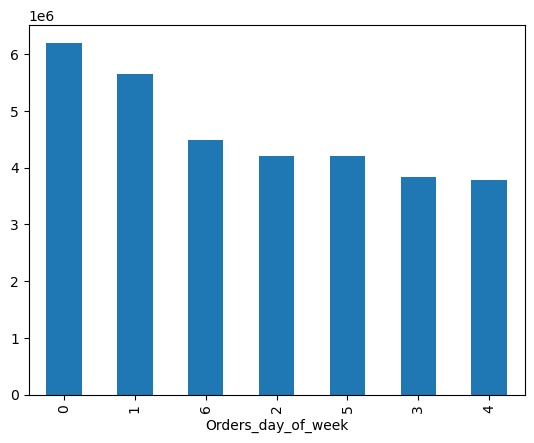

In [4]:
#Creating a bar chart (categorical data)
ords_prods_cust_merged['Orders_day_of_week'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

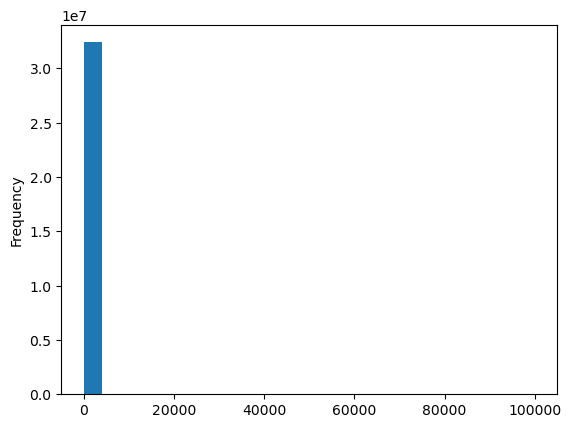

In [5]:
#Creating a histogram, but I should have gotten 25 bins. Checking prices 
ords_prods_cust_merged['Prices'].plot.hist(bins = 25)

In [6]:
ords_prods_cust_merged['Prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: Prices, dtype: float64

In [7]:
ords_prods_cust_merged['Prices'].median()

7.4

In [8]:
#Highest price is 99,999 - that's not right!
ords_prods_cust_merged['Prices'].max()

99999.0

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Prices', ylabel='Prices'>

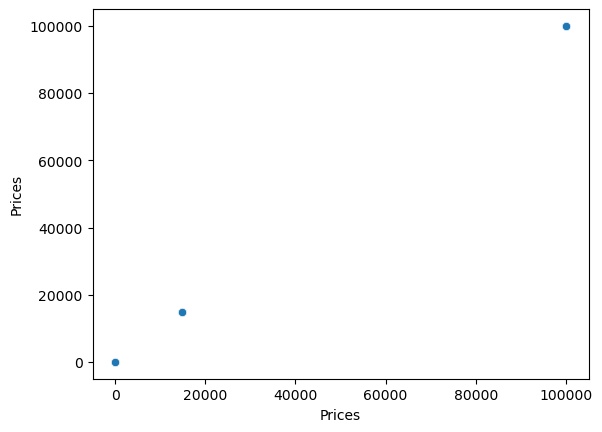

In [9]:
#Using a scatterplot to check if this 99,999 is an outlier
sns.scatterplot(x = 'Prices', y = 'Prices',data = ords_prods_cust_merged)

There are two big outliers - 20,000 and the 99,999 number. SInce the mean is 1.9 and median is 7.4, we expect for most prices of goods to be around this numnber. 

In [10]:
#Checking to see HOW many items are above $100, the max an item at a store would go for
#There are 5127 rows that have items prices above 100
ords_prods_cust_merged.loc[ords_prods_cust_merged['Prices'] > 100]

,Product_id,Product_name,Aisle_id,Department_id,Prices,Order_id,User_id,Order_number,Orders_day_of_week,Order_hour_of_day,Days_since_last_order,Add_to_cart_order,Reordered,Price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,Max_order,Loyalty_flag,Average_price,Spending_flag,Median_days_since_last_order,Frequency_flag,First_name,Last_name,Gender,State,Age,Date_joined,N_dependants,Fam_status,Income
23024,33664,2 % Reduced Fat Milk,84,16,99999.0,1489110,43360,3,1,10,6.0,27,0,High-range product,Regularly busy,Second busiest day,Most_orders,18,Regular customer,855.954140,High spender,8.0,Frequent_customer,Marilyn,Baker,Female,Florida,67,2017-07-16,3,married,149199
23025,33664,2 % Reduced Fat Milk,84,16,99999.0,2322035,43360,4,1,10,14.0,14,1,High-range product,Regularly busy,Second busiest day,Most_orders,18,Regular customer,855.954140,High spender,8.0,Frequent_customer,Marilyn,Baker,Female,Florida,67,2017-07-16,3,married,149199
23026,33664,2 % Reduced Fat Milk,84,16,99999.0,420339,43360,5,1,10,14.0,7,1,High-range product,Regularly busy,Second busiest day,Most_orders,18,Regular customer,855.954140,High spender,8.0,Frequent_customer,Marilyn,Baker,Female,Florida,67,2017-07-16,3,married,149199
23027,33664,2 % Reduced Fat Milk,84,16,99999.0,2912515,43360,7,2,9,28.0,11,1,High-range product,Regularly busy,Regularly busy,Average_orders,18,Regular customer,855.954140,High spender,8.0,Frequent_customer,Marilyn,Baker,Female,Florida,67,2017-07-16,3,married,149199
28712,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,518829,54136,22,1,9,11.0,10,0,High-range product,Regularly busy,Second busiest day,Average_orders,23,Regular customer,98.685276,High spender,11.0,Regular customer,Benjamin,Parsons,Male,New Jersey,40,2020-01-28,0,single,160524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32383871,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3288900,136909,1,5,18,NaN,6,0,High-range product,Regularly busy,Regularly busy,Average_orders,27,Regular customer,1154.823077,High spender,5.0,Frequent_customer,Deborah,Dillon,Female,New Jersey,30,2017-05-14,2,married,161606
32383872,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,285306,136909,4,1,17,7.0,3,1,High-range product,Regularly busy,Second busiest day,Average_orders,27,Regular customer,1154.823077,High spender,5.0,Frequent_customer,Deborah,Dillon,Female,New Jersey,30,2017-05-14,2,married,161606
32383873,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2744314,136909,13,6,12,4.0,3,1,High-range product,Regularly busy,Regularly busy,Average_orders,27,Regular customer,1154.823077,High spender,5.0,Frequent_customer,Deborah,Dillon,Female,New Jersey,30,2017-05-14,2,married,161606
32396750,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2716179,2700,7,2,7,6.0,3,0,High-range product,Regularly busy,Regularly busy,Average_orders,14,Regular customer,831.905556,High spender,2.0,Frequent_customer,Charles,Crosby,Male,Washington,67,2019-04-19,0,divorced/widowed,225873


In [11]:
#Converting these items in NAN so that they don't skew our dataset
ords_prods_cust_merged.loc[ords_prods_cust_merged['Prices'] >100, 'Prices'] = np.nan

In [12]:
ords_prods_cust_merged['Prices'].max()

25.0

<Axes: ylabel='Frequency'>

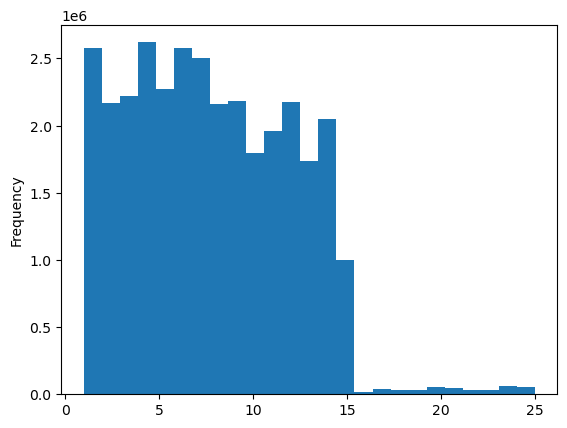

In [13]:
#Recreating histogram
ords_prods_cust_merged['Prices'].plot.hist(bins = 25)

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

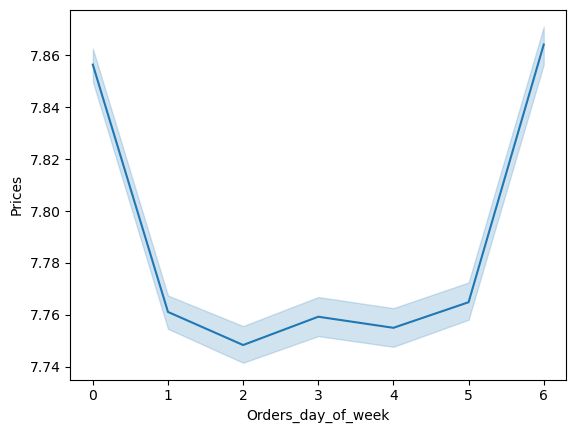

In [14]:
#Creating a linegraph

#Randomizing that sample
np.random.seed(4)

#Creating a random uniform distribution of numbers less than .07 
dev = np.random.rand(len(ords_prods_cust_merged)) <= 0.7

#70% of data is stored in big, 30% in small

big = ords_prods_cust_merged[dev]
small = ords_prods_cust_merged[~dev]

#Making a linechart from only the columns we need
df_2 = small[['Orders_day_of_week','Prices']]

#Create linechart
line = sns.lineplot(data = df_2, x = 'Orders_day_of_week',y = 'Prices')

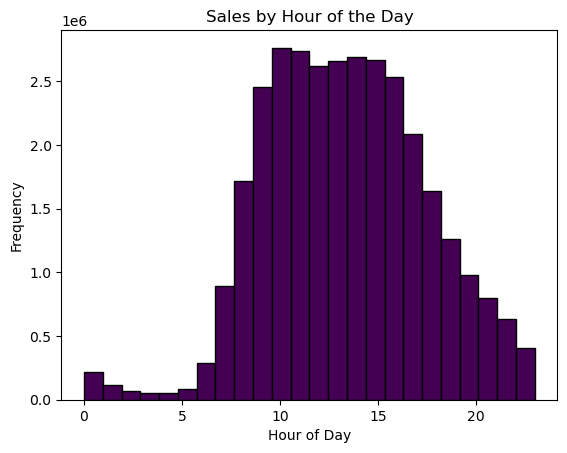

In [15]:
#Creating a histogram
# Create a list of distinct colors for each hour
colors = plt.cm.viridis(range(24))

# Plot the histogram with color coding
hist_sales = ords_prods_cust_merged['Order_hour_of_day'].plot.hist(bins=24, color=colors, edgecolor='black')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Sales by Hour of the Day')

# Display the plot
plt.show()

The most popular hour for sales is 10AM and 11AM. The least busiest hours are from midnight to 6AM

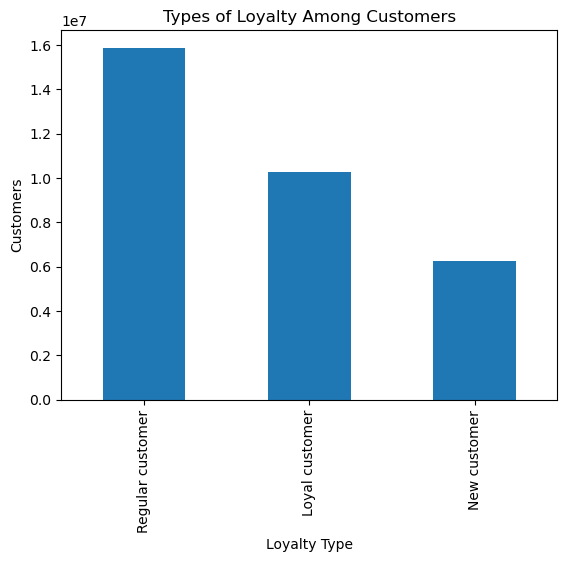

In [16]:
bar_loyalty = ords_prods_cust_merged['Loyalty_flag'].value_counts().plot.bar()

# Add labels and title
plt.xlabel('Loyalty Type')
plt.ylabel('Customers')
plt.title('Types of Loyalty Among Customers')

# Display the plot
plt.show()

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

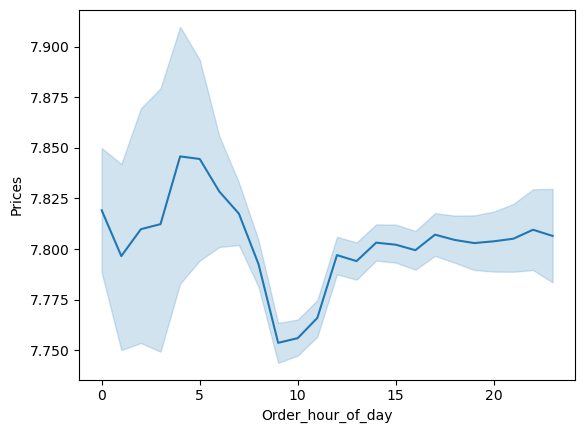

In [18]:
#Creating a line graph showing prices by hour of the day

#Making a df with only the columns we need 
df_3 = small[['Order_hour_of_day', 'Prices']]

#Making the line graph 
line_prices = sns.lineplot(data = df_3, x = 'Order_hour_of_day',y = 'Prices')

The morning sees the sales of higher ticket items, even though it's not when the most orders are purchased. 10AM which is the most popular purchase time, sees sales of lower ticket items.

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

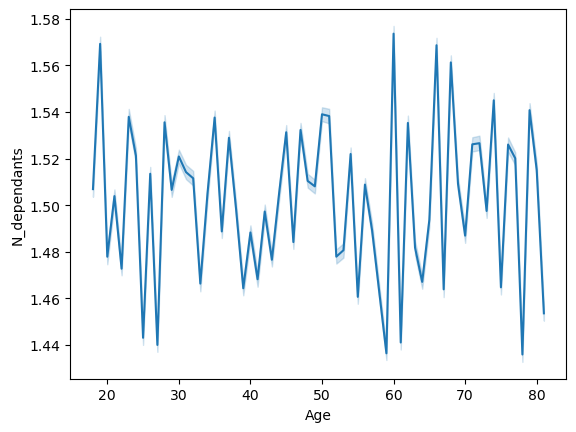

In [19]:
#EXPLORATORY ANALYSIS OF CUSTOMERS
#Line chart exploring connections between age and dependents 
line_depen = sns.lineplot(data = ords_prods_cust_merged, x = 'Age',y = 'N_dependants')

Linechart does not show a strong relationship between age and number of dependents. 

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


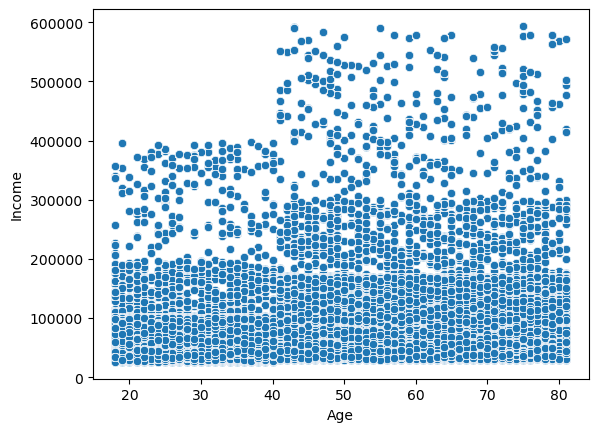

In [20]:
#Creating Scatterplot that shows age and spending power relationsup
scatter_income = sns.scatterplot(x = 'Age', y = 'Income',data = ords_prods_cust_merged)

Age is trending to ther right which suggest that those who are older have more spending power. There are virtually no adults younger than early 30's whos income is above 400,000

In [21]:
hist_sales.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_sales_HOTD.png'))

In [22]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_frequency.png'))

In [23]:
line_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices,HOTD.png'))

In [24]:
line_depen.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependents.png'))

In [25]:
scatter_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income_age.png'))

In [26]:
ords_prods_cust_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merged_updated.pkl'))